# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [73]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_09': 0,
                'chr_9_inversion': 1                
               }

# The value should be 0 or 1, if you are going to run binary classification in TensorFlow

## File Import

In [3]:
# pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
# pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
# pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'
# ///////////////////////////////////////////////
# Merged Database

try:
    pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\'

except:
    pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement_Merged\\'

theWhole = {}


f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [4]:
theWhole['chr_9_inversion']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-10R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-11R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-12R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-13R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-14R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-15R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-17R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433_9p12q-18R.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_9_inversion\\182433

In [5]:
type(theWhole)

dict

In [6]:
theWhole.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

## Cross Validation

### KFold

#### Let's say split every class into 7 folds

In [7]:
kfold = KFold(7, True, 1)

# 分成7个子集，每次6个子集用于训练，1个子集用于测试

In [8]:
X_train_name = {}
X_test_name = {}

for chrNo in theWhole.keys():

    X_train_name[chrNo] = {}
    X_test_name[chrNo] = {}

    split_method_number = 0

    generator_kFold = kfold.split(theWhole[chrNo])
    
    print('Chromosome/Abnormality: ', chrNo)

    for train, test in generator_kFold:    

        print('Split Method No. ', split_method_number)

        print('Train: ', train, 'Test: ', test, '\n')

        # train和test的值是7个split分法的每个分法的list

        X_train_name[chrNo][split_method_number] = []
        X_test_name[chrNo][split_method_number] = []




        for split_method_train in train:

            # split_method_train的值是每个split方法，其值为图像序号
            X_train_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_train])


        for split_method_test in test:

            # split_method_test的值是每个split方法，其值为图像序号
            X_test_name[chrNo][split_method_number].append(theWhole[chrNo][split_method_test])

        split_method_number = split_method_number + 1

Chromosome/Abnormality:  chr_09
Split Method No.  0
Train:  [  0   1   2   3   5   7   8   9  10  13  14  15  16  17  19  20  21  22
  23  24  25  26  28  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  86  87  88  93  94  95  96  97  98  99 100 101 103 104
 105 108 109 110 111 112 113 114 115 116 117 118 119 121 122 123 124 126
 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145
 146 148 149 150 151 152 153 155 156 157 158 160 161 162 164 165 166 167
 168 169 170 171 173 174 175 176 177 178 179 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 206
 207 208 209 210 211 213 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 234 235 236 237 238 239 240 241 242 243 244 245 246
 248 249 250 252 253 254 255 256 257 258 259 263 264 265 266 267

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guid

In [9]:
len(X_train_name['chr_09'])

7

In [10]:
len(X_train_name['chr_09'][0])

282

In [11]:
len(X_test_name['chr_09'][0])

47

In [12]:
X_train_name['chr_09'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-12L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-15L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-17L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-18L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-19L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-20L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement

In [13]:
X_test_name['chr_09'][1]

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-10L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-5L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\184431-_9p12q13_4L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\184431-_9p12q13_6L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_9L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193067-9p12q_12L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrange

In [14]:
X_train_name

{'chr_09': {0: ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-1L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\182433_9p12q-20L.bmp',
   'D:\\Users\\Chuan\\Documents\\D

# Image Input

## Training Data

In [15]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][0]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.031914472579956055


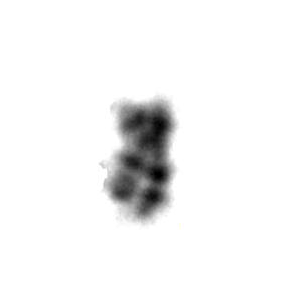

In [16]:
image['chr_09'][1]

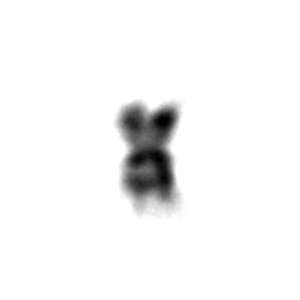

In [17]:
image['chr_9_inversion'][1]

### Functions

In [18]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [19]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### Data Extraction from Images

In [20]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

50.045201778411865


In [21]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

## Validation Data

In [22]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][0]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.015957117080688477


In [23]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [24]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [25]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

# Numpy Array

In [26]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [27]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [28]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
len(X_train)

488

In [30]:
X_train[0].shape

(300, 300)

# Convolutional Neural Network

## Data Preparation

In [31]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

## Training

### Model

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [34]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### Tensorboard Initilization

In [35]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [37]:
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/150
16/16 [==============================] - 6s 197ms/step - loss: 16.8523 - accuracy: 0.5000 - val_loss: 0.9630 - val_accuracy: 0.4268
Epoch 2/150
16/16 [==============================] - 1s 69ms/step - loss: 0.7519 - accuracy: 0.5205 - val_loss: 0.6915 - val_accuracy: 0.4268
Epoch 3/150
16/16 [==============================] - 1s 69ms/step - loss: 0.6670 - accuracy: 0.6578 - val_loss: 0.7417 - val_accuracy: 0.5732
Epoch 4/150
16/16 [==============================] - 2s 109ms/step - loss: 0.9179 - accuracy: 0.6393 - val_loss: 0.6838 - val_accuracy: 0.7195
Epoch 5/150
16/16 [==============================] - 1s 70ms/step - loss: 0.5212 - accuracy: 0.8012 - val_loss: 0.4997 - val_accuracy: 0.7683
Epoch 6/150
16/16 [==============================] - 1s 70ms/step - loss: 0.5638 - accuracy: 0.8484 - val_loss: 0.4525 - val_accuracy: 0.8902
Epoch 7/150
16/16 [==============================] - 1s 70ms/step - loss: 0.6838 - accuracy: 0.8176 - val_loss: 3.2735 - val_accuracy: 0.4268
Epo

Epoch 58/150
16/16 [==============================] - 1s 71ms/step - loss: 3.1243e-07 - accuracy: 1.0000 - val_loss: 4.7203 - val_accuracy: 0.8780
Epoch 59/150
16/16 [==============================] - 1s 72ms/step - loss: 2.1643e-07 - accuracy: 1.0000 - val_loss: 4.8008 - val_accuracy: 0.8780
Epoch 60/150
16/16 [==============================] - 1s 70ms/step - loss: 1.3875e-07 - accuracy: 1.0000 - val_loss: 4.8678 - val_accuracy: 0.8780
Epoch 61/150
16/16 [==============================] - 1s 72ms/step - loss: 9.0383e-08 - accuracy: 1.0000 - val_loss: 4.9143 - val_accuracy: 0.8780
Epoch 62/150
16/16 [==============================] - 1s 72ms/step - loss: 6.9131e-08 - accuracy: 1.0000 - val_loss: 4.9538 - val_accuracy: 0.8780
Epoch 63/150
16/16 [==============================] - 1s 70ms/step - loss: 5.7406e-08 - accuracy: 1.0000 - val_loss: 4.9824 - val_accuracy: 0.8780
Epoch 64/150
16/16 [==============================] - 1s 71ms/step - loss: 5.1299e-08 - accuracy: 1.0000 - val_loss: 5

16/16 [==============================] - 1s 69ms/step - loss: 5.1299e-09 - accuracy: 1.0000 - val_loss: 5.5930 - val_accuracy: 0.8780
Epoch 114/150
16/16 [==============================] - 1s 70ms/step - loss: 5.1299e-09 - accuracy: 1.0000 - val_loss: 5.5981 - val_accuracy: 0.8780
Epoch 115/150
16/16 [==============================] - 1s 71ms/step - loss: 4.8856e-09 - accuracy: 1.0000 - val_loss: 5.6037 - val_accuracy: 0.8780
Epoch 116/150
16/16 [==============================] - 1s 71ms/step - loss: 4.8856e-09 - accuracy: 1.0000 - val_loss: 5.6098 - val_accuracy: 0.8780
Epoch 117/150
16/16 [==============================] - 1s 71ms/step - loss: 4.8856e-09 - accuracy: 1.0000 - val_loss: 5.6150 - val_accuracy: 0.8780
Epoch 118/150
16/16 [==============================] - 1s 70ms/step - loss: 4.6413e-09 - accuracy: 1.0000 - val_loss: 5.6204 - val_accuracy: 0.8780
Epoch 119/150
16/16 [==============================] - 1s 71ms/step - loss: 4.6413e-09 - accuracy: 1.0000 - val_loss: 5.6271 -

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### Tensorboard Display

In [39]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 7 days, 22:41:57 ago. (Use '!kill 19276' to kill it.)

## Performance Measures

In [40]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.878


In [41]:
len(X_test)

82

In [42]:
y_predict = model.predict(X_test)

In [43]:
len(y_predict)

82

In [47]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []
y_predict_filtered_prob = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)
    y_predict_filtered_prob.append(maximum)

In [55]:
print(classification_report(y_test, y_predict_filtered, target_names=['chr_09', 'chr_9_inversion']))

                 precision    recall  f1-score   support

         chr_09       0.89      0.89      0.89        47
chr_9_inversion       0.86      0.86      0.86        35

      micro avg       0.88      0.88      0.88        82
      macro avg       0.88      0.88      0.88        82
   weighted avg       0.88      0.88      0.88        82



### Confusion Matrix (混淆矩阵)

In [48]:
label = ['chr_09', 'chr_9_inversion']

In [49]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_09,chr_9_inversion
chr_09,42,5
chr_9_inversion,5,30


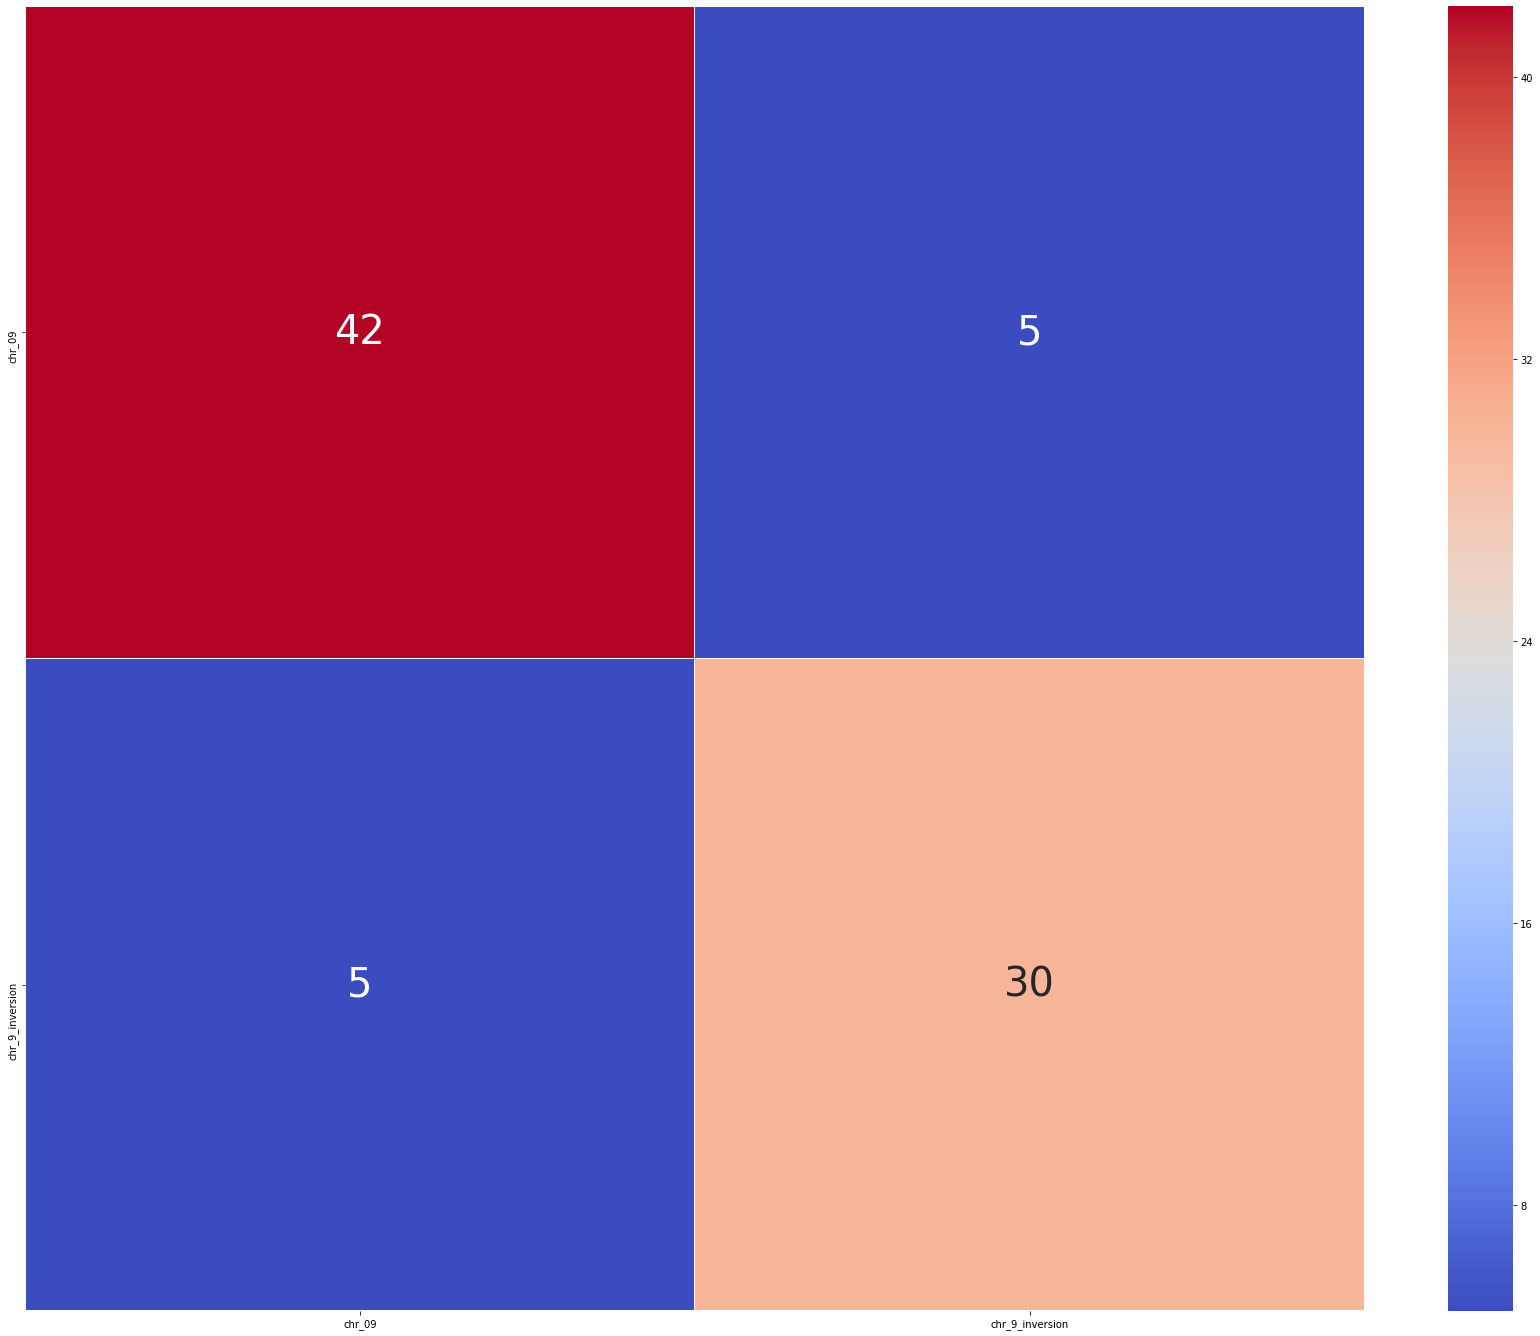

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 40})

                 precision    recall  f1-score   support

         chr_09       0.89      0.89      0.89        47
chr_9_inversion       0.86      0.86      0.86        35

      micro avg       0.88      0.88      0.88        82
      macro avg       0.88      0.88      0.88        82
   weighted avg       0.88      0.88      0.88        82



## Save the Model

In [57]:
model.save('saved_model/model_cnn_chr09')

INFO:tensorflow:Assets written to: saved_model/model_cnn_chr09\assets


## Load the Model

In [58]:
model_reload = keras.models.load_model('saved_model/model_cnn_chr09')

In [59]:
y_predict = model_reload.predict(X_test)

In [60]:
y_predict

array([[1.00000000e+00, 2.59259254e-01],
       [3.84641346e-03, 9.99974012e-01],
       [9.99987483e-01, 4.67442036e-01],
       [6.23281012e-05, 1.00000000e+00],
       [1.00000000e+00, 3.85323495e-01],
       [1.00000000e+00, 4.42005754e-01],
       [1.00000000e+00, 1.00829221e-01],
       [1.00000000e+00, 1.18968315e-01],
       [1.00000000e+00, 3.00656408e-01],
       [1.00000000e+00, 2.51764134e-02],
       [1.00000000e+00, 2.21129045e-01],
       [1.00000000e+00, 2.96531975e-01],
       [1.00000000e+00, 2.36280665e-01],
       [1.00000000e+00, 2.76612431e-01],
       [1.00000000e+00, 4.77569073e-01],
       [1.00000000e+00, 3.07033837e-01],
       [1.00000000e+00, 1.57850355e-01],
       [1.00000000e+00, 6.60412759e-02],
       [1.00000000e+00, 1.02125280e-01],
       [1.00000000e+00, 3.57680351e-01],
       [9.99999642e-01, 5.61999857e-01],
       [1.00000000e+00, 2.17097893e-01],
       [1.00000000e+00, 2.17343822e-01],
       [1.00000000e+00, 2.95603216e-01],
       [1.000000

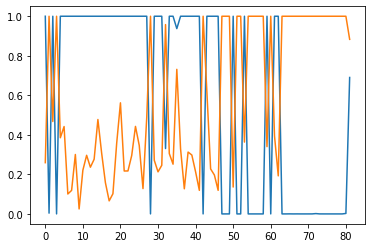

In [61]:
plt.plot(y_predict)

In [64]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
y_predict_1D = y_predict[:,1]

In [76]:
y_predict_1D

array([0.25925925, 0.999974  , 0.46744204, 1.        , 0.3853235 ,
       0.44200575, 0.10082922, 0.11896832, 0.3006564 , 0.02517641,
       0.22112904, 0.29653198, 0.23628066, 0.27661243, 0.47756907,
       0.30703384, 0.15785035, 0.06604128, 0.10212528, 0.35768035,
       0.56199986, 0.2170979 , 0.21734382, 0.29560322, 0.44269723,
       0.34661773, 0.1280779 , 0.48864827, 0.9999999 , 0.27132216,
       0.21287209, 0.24603596, 0.9577985 , 0.30530727, 0.2516126 ,
       0.7313491 , 0.3293799 , 0.127056  , 0.3128534 , 0.2978854 ,
       0.2127466 , 0.11919884, 1.        , 0.61828834, 0.22755116,
       0.1968659 , 0.11926894, 1.        , 1.        , 1.        ,
       0.13592874, 1.        , 1.        , 0.36338797, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.34025574,
       1.        , 0.39454043, 0.19247843, 1.        , 1.        ,
       0.99999976, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9999912 , 1.        , 1.     

## ROC

In [77]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D)
auc_rf = auc(fpr, tpr)

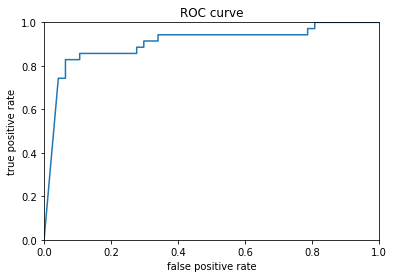

In [79]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [80]:
tpr

array([0.        , 0.74285714, 0.74285714, 0.82857143, 0.82857143,
       0.85714286, 0.85714286, 0.88571429, 0.88571429, 0.91428571,
       0.91428571, 0.94285714, 0.94285714, 0.97142857, 0.97142857,
       1.        , 1.        ])

In [81]:
fpr

array([0.        , 0.04255319, 0.06382979, 0.06382979, 0.10638298,
       0.10638298, 0.27659574, 0.27659574, 0.29787234, 0.29787234,
       0.34042553, 0.34042553, 0.78723404, 0.78723404, 0.80851064,
       0.80851064, 1.        ])